In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Create a directory for reports if it doesn't exist
os.makedirs('./data', exist_ok=True)


## Load Data

In [8]:

users_df = pd.read_csv('../PREP/data/prep_users.csv')
departments_df = pd.read_csv('../PREP/data/prep_departments.csv')
teams_df = pd.read_csv('../PREP/data/prep_teams.csv')
courses_df = pd.read_csv('../PREP/data/prep_courses.csv')
learning_materials_df = pd.read_csv('../PREP/data/prep_learning_materials.csv')
quizzes_df = pd.read_csv('../PREP/data/prep_quizzes.csv')
user_progress_df = pd.read_csv('../PREP/data/prep_user_progress.csv')
results_df = pd.read_csv('../PREP/data/prep_results.csv')
user_sessions_df = pd.read_csv('../PREP/data/prep_user_sessions.csv')
feedbacks_df = pd.read_csv('../PREP/data/prep_feedbacks.csv')
posts_df = pd.read_csv('../PREP/data/prep_posts.csv')

## Reports based on users

In [9]:
# Report 1: Number of Users per Department
user_department_count = users_df.groupby('departmentId').size().reset_index(name='user_count')
user_department_count = user_department_count.merge(departments_df, left_on='departmentId', right_on='id')
# Save to CSV
user_department_count.to_csv('./data/users_per_department.csv', index=False)

# Report 2: Number of Users per team
user_team_count = users_df.groupby('teamId').size().reset_index(name='user_count')
user_team_count = user_team_count.merge(teams_df, left_on='teamId', right_on='id')
# Save to CSV
user_team_count.to_csv('./data/users_per_team.csv', index=False)


# Report 3: User Progress Completion Rate
completion_rate = user_progress_df.groupby('completed').size().reset_index(name='count')
completion_rate['completion_rate'] = completion_rate['count'] / completion_rate['count'].sum() * 100

# Save to CSV
completion_rate.to_csv('./data/completion_rate.csv', index=False)

# Check the columns of each DataFrame
print("Users DataFrame Columns:", users_df.columns)
print("Posts DataFrame Columns:", posts_df.columns)
print("Feedbacks DataFrame Columns:", feedbacks_df.columns)
print("Results DataFrame Columns:", results_df.columns)
print("User Sessions DataFrame Columns:", user_sessions_df.columns)

# Report 1: User Post Count
user_post_count = posts_df.groupby('userId').size().reset_index(name='post_count')
print(user_post_count)
# Report 2: User Feedback Count
user_feedback_count = feedbacks_df.groupby('userId').size().reset_index(name='feedback_count')

# Report 3: Average Quiz Scores
average_quiz_scores = results_df.groupby('userId').agg(
    avg_score=('score', 'mean')
).reset_index()

# Report 4: Total Time Spent by Users
total_time_spent = user_sessions_df.groupby('userId').agg(
    total_duration=('duration', 'sum')
).reset_index()


# Merge all reports into a single DataFrame
merged_report = user_post_count.merge(user_feedback_count, on='userId', how='outer')
merged_report = merged_report.merge(average_quiz_scores, on='userId', how='outer')
merged_report = merged_report.merge(total_time_spent, on='userId', how='outer')

# Fill NaN values with 0 in the relevant columns
merged_report.fillna({
    'post_count': 0,
    'feedback_count': 0,
    'avg_score': 0,
    'total_duration': 0
}, inplace=True)

# Rename columns for clarity
merged_report.rename(columns={
    'post_count': 'Post Count',
    'feedback_count': 'Feedback Count',
    'avg_score': 'Average Quiz Score',
    'total_duration': 'Total Duration (seconds)'
}, inplace=True)


# Save the merged report to a single CSV file
merged_report.to_csv('./data/fact_user_engagement.csv', index=False)

# Print the merged report for verification
# print(merged_report)


Users DataFrame Columns: Index(['id', 'name', 'email', 'password', 'isAdmin', 'departmentId', 'teamId'], dtype='object')
Posts DataFrame Columns: Index(['id', 'content', 'createdAt', 'userId', 'courseId'], dtype='object')
Feedbacks DataFrame Columns: Index(['id', 'content', 'rating', 'createdAt', 'userId', 'courseId'], dtype='object')
Results DataFrame Columns: Index(['id', 'userId', 'quizId', 'score', 'totalScore'], dtype='object')
User Sessions DataFrame Columns: Index(['id', 'userId', 'duration'], dtype='object')
      userId  post_count
0          1           1
1          3           1
2          4           1
3          5           1
4         13           1
...      ...         ...
2596    9965           1
2597    9970           1
2598    9975           1
2599    9978           1
2600    9985           1

[2601 rows x 2 columns]


## Plotting graph for user

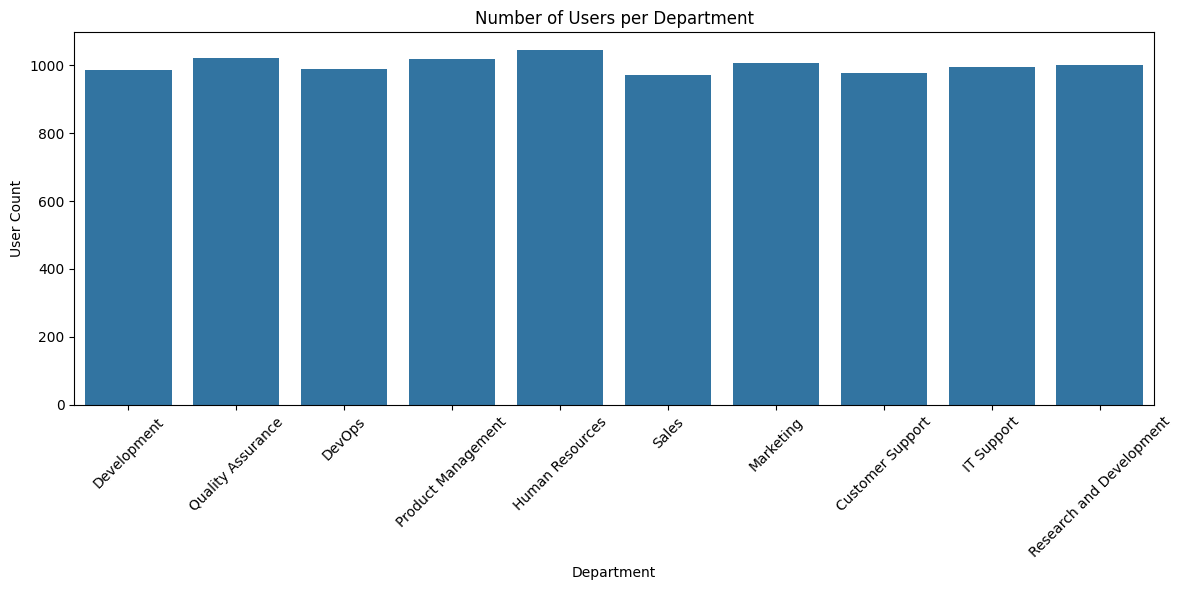

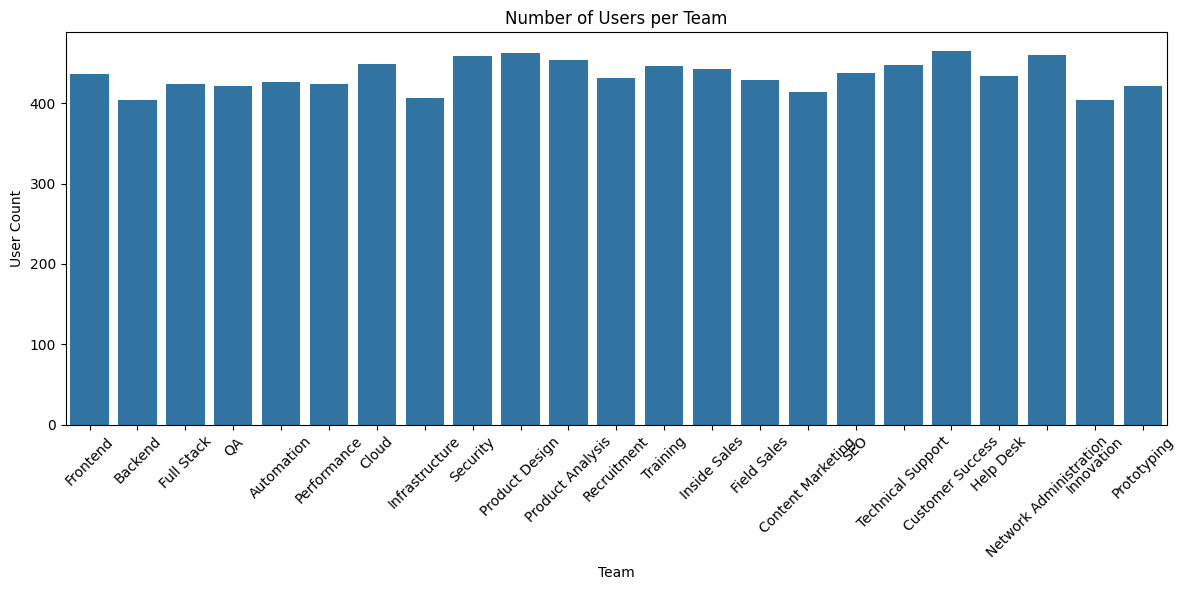

In [10]:
# Plotting Users per Department
plt.figure(figsize=(12, 6))
sns.barplot(data=user_department_count, x='name', y='user_count')
plt.title('Number of Users per Department')
plt.xlabel('Department')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('./data/users_per_department.png')
plt.show()
plt.close()

# Plotting Users per team
plt.figure(figsize=(12, 6))
sns.barplot(data=user_team_count, x='name', y='user_count')
plt.title('Number of Users per Team')
plt.xlabel('Team')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('./REPORT/users_per_department.png')
plt.show()
plt.close()


## For department

In [11]:
# Report 1: Number of Courses by Department
courses_by_department = courses_df.groupby('teamId').size().reset_index(name='course_count')
courses_by_department = courses_by_department.merge(teams_df[['id', 'departmentId']], left_on='teamId', right_on='id')
courses_by_department = courses_by_department.groupby('departmentId').agg(course_count=('course_count', 'sum')).reset_index()

# Report 2: Number of Courses by Team
courses_by_team = courses_df.groupby('teamId').size().reset_index(name='course_count')

# Report 3: Total and Average Time Spent by Department
total_time_by_department = user_sessions_df.merge(users_df[['id', 'departmentId']], left_on='userId', right_on='id').groupby('departmentId').agg(
    total_duration=('duration', 'sum'),
    avg_duration=('duration', 'mean')
).reset_index()

# Report 4: Total and Average Time Spent by Team
total_time_by_team = user_sessions_df.merge(users_df[['id', 'teamId']], left_on='userId', right_on='id').groupby('teamId').agg(
    total_duration=('duration', 'sum'),
    avg_duration=('duration', 'mean')
).reset_index()

# Report 5: Feedback Count and Average Feedback by Department
feedback_by_department = feedbacks_df.merge(users_df[['id', 'departmentId']], left_on='userId', right_on='id').groupby('departmentId').agg(
    feedback_count=('userId', 'count'),  # Count based on userId
    avg_rating=('rating', 'mean')
).reset_index()

# Report 6: Feedback Count and Average Feedback by Team
feedback_by_team = feedbacks_df.merge(users_df[['id', 'teamId']], left_on='userId', right_on='id').groupby('teamId').agg(
    feedback_count=('userId', 'count'),  # Count based on userId
    avg_rating=('rating', 'mean')
).reset_index()

# Report 7: Average Quiz Scores by Department
average_quiz_scores_department = results_df.merge(users_df[['id', 'departmentId']], left_on='userId', right_on='id').groupby('departmentId').agg(
    avg_score=('score', 'mean')
).reset_index()

# Report 8: Average Quiz Scores by Team
average_quiz_scores_team = results_df.merge(users_df[['id', 'teamId']], left_on='userId', right_on='id').groupby('teamId').agg(
    avg_score=('score', 'mean')
).reset_index()

# Report 9: Total Post Count by Department
if 'userId' in posts_df.columns and 'id' in users_df.columns:
    posts_by_department = posts_df.merge(users_df[['id', 'departmentId']], left_on='userId', right_on='id').groupby('departmentId').agg(
        total_posts=('userId', 'count')  # Count based on userId
    ).reset_index()
else:
    print("Error: 'userId' or 'id' not found in posts_df or users_df.")

# Report 10: Total Post Count by Team
if 'userId' in posts_df.columns and 'id' in users_df.columns:
    posts_by_team = posts_df.merge(users_df[['id', 'teamId']], left_on='userId', right_on='id').groupby('teamId').agg(
        total_posts=('userId', 'count')  # Count based on userId
    ).reset_index()
else:
    print("Error: 'userId' or 'id' not found in posts_df or users_df.")

# Merge all department reports
department_report = courses_by_department.merge(total_time_by_department, on='departmentId', how='left')
department_report = department_report.merge(feedback_by_department, on='departmentId', how='left')
department_report = department_report.merge(average_quiz_scores_department, on='departmentId', how='left')

# Include posts data if available
if 'total_posts' in posts_by_department.columns:
    department_report = department_report.merge(posts_by_department, on='departmentId', how='left')

# Save department report to CSV
department_report.to_csv('./data/fact_department.csv', index=False)

# Merge all team reports
team_report = courses_by_team.merge(total_time_by_team, on='teamId', how='left')
team_report = team_report.merge(feedback_by_team, on='teamId', how='left')
team_report = team_report.merge(average_quiz_scores_team, on='teamId', how='left')

# Include posts data if available
if 'total_posts' in posts_by_team.columns:
    team_report = team_report.merge(posts_by_team, on='teamId', how='left')

# Save team report to CSV
team_report.to_csv('./data/team_report.csv', index=False)

print("Reports generated successfully!")


Reports generated successfully!


## Reports based on courses

In [12]:

# Merge user progress with users to get department and team info
user_progress_with_info = user_progress_df.merge(users_df[['id', 'departmentId', 'teamId']], 
                                                  left_on='userId', right_on='id', how='left')

# Function to calculate completion rates
def calculate_completion_rate(group_df):
    total_count = group_df.shape[0]
    completed_count = group_df['completed'].sum()
    return (completed_count / total_count) * 100 if total_count > 0 else 0

# 1. Completion Rate by Department
completion_by_department = user_progress_with_info.groupby('departmentId').apply(calculate_completion_rate).reset_index(name='completion_rate')
completion_by_department = completion_by_department.merge(departments_df, left_on='departmentId', right_on='id', how='left')

# Save completion rate by department
completion_by_department.to_csv('./data/completion_by_department.csv', index=False)

# 2. Completion Rate by Team
completion_by_team = user_progress_with_info.groupby('teamId').apply(calculate_completion_rate).reset_index(name='completion_rate')
completion_by_team = completion_by_team.merge(teams_df, left_on='teamId', right_on='id', how='left')

# Save completion rate by team
completion_by_team.to_csv('./data/completion_by_team.csv', index=False)

# 3. Completion Rate by User
completion_by_user = user_progress_with_info.groupby('userId').apply(calculate_completion_rate).reset_index(name='completion_rate')

# Save completion rate by user
completion_by_user.to_csv('./data/completion_by_user.csv', index=False)

# print("Completion rates calculated and saved in the Reports folder.")


C:\Users\Admi\AppData\Local\Temp\ipykernel_8552\4050681202.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  completion_by_department = user_progress_with_info.groupby('departmentId').apply(calculate_completion_rate).reset_index(name='completion_rate')
C:\Users\Admi\AppData\Local\Temp\ipykernel_8552\4050681202.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  completion_by_team = user_progress_with_in

In [13]:
# Calculate average feedback rating for each course
average_feedback = feedbacks_df.groupby('courseId').agg(
    avg_feedback=('rating', 'mean')  # Average rating for each course
).reset_index()

# Calculate total post count for each course
post_count = posts_df.groupby('courseId').agg(
    total_posts=('id', 'count')  # Count of posts for each course
).reset_index()

# Merge the two results on courseId
course_stats = average_feedback.merge(post_count, on='courseId', how='left')

#  Fill NaN values with 0 for total_posts if there are no posts
course_stats['total_posts'] = course_stats['total_posts'].fillna(0)

# Rename columns for clarity
course_stats = course_stats.rename(columns={
    'courseId': 'course_id'
})

# Display or save the results
# print(course_stats)
# save to CSV
course_stats.to_csv('./data/fact_course_stats.csv', index=False)


### User Dimension Table

In [14]:

# # Create the user dimension table
dim_user = users_df[['id', 'name', 'email', 'departmentId', 'teamId']]

# Save as CSV
dim_user.to_csv('./data/dim_user.csv', index=False)



### Course Dimension Table

In [15]:
# Create the course dimension table
dim_course = courses_df[['id', 'name', 'content', 'teamId']]

# Save as CSV
dim_course.to_csv('./data/dim_course.csv', index=False)



### Department Dimension Table

In [16]:
departments_df
# Create the department dimension table
dim_department = departments_df[['id', 'name']]

# # Save as CSV
dim_department.to_csv('./data/dim_department.csv', index=False)


### Team Dimension Table

In [17]:
# Create the team dimension table
dim_team = teams_df[['id', 'name', 'departmentId']]

# Save as CSV
dim_team.to_csv('./data/dim_team.csv', index=False)

